In [1]:
import requests
from PIL import Image
from quote import quote
from src.image.crop import crop
from src.image.draw import resize_img
from src.image.extract import ApiImgExtractor
from src.image.merge import merge_text_to_image
from src.paths import LOCAL_PROCESSED_DATA_PATH

themes = ['God'
#           , 'Einstein', 'Travel', 'Motivation', 'Religion'
         ]
format_ = "PNG"
n = 1 # amount of quotes per theme
for t in themes:
    api = ApiImgExtractor('unsplash')
    quotes = quote(t, limit=n)
    api.query(_search_params={
        'q': t,
        'imgType': 'photos'
    })
    for i, (q, img_url) in enumerate(zip(quotes, api.img_urls)):
        print(t, i)
        if not q or not img_url:
            break
        filepath = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.{format_}"
        img = crop(img_url, export=False, output_size=(1080,1080))
        txt = q['quote']
        post = merge_text_to_image(img, txt, profile_url="@your.success.pills", txt_aspect_ratio=.4, txt_brightness=3)
        post.save(filepath, format_, quality=90)
post

God 0


ValueError: unknown file extension: 

In [2]:
post.show()

In [2]:
def add_blurred_halo(im, blur_radius: int = 10):
    blurred_halo = im.filter(ImageFilter.GaussianBlur(blur_radius))
    gray_halo = blurred_halo.convert('LA').convert('RGBA')
    enhancer = ImageEnhance.Brightness(gray_halo)
    gray_halo = enhancer.enhance(0)
    gray_halo.paste(im, (0, 0), im)
    return gray_halo


In [23]:
from PIL import ImageFilter, ImageOps, ImageDraw, ImageChops, ImageEnhance 
from src.image.draw import draw_text, resize_img
def add_blurred_halo(im, blur_radius: int = 6):
    blurred_halo = im.filter(ImageFilter.GaussianBlur(blur_radius))
    ImageDraw.Draw(blurred_halo)
    gray_halo = blurred_halo.convert('LA').convert('RGBA')
    enhancer = ImageEnhance.Brightness(gray_halo)
    gray_halo = enhancer.enhance(0)
    gray_halo.paste(im, (0, 0), im)
    return gray_halo.convert('RGBA')
txt='vai vendo que loko isso vai fica'
txt_img = draw_text(txt, fontcolor_hex='red', blured_halo=False)
img = add_blurred_halo(txt_img).convert("RGBA")

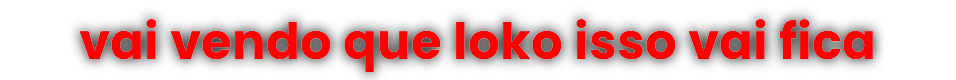

In [17]:
img

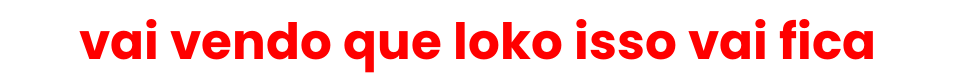

In [21]:
txt_img

In [25]:
Image.composite(img,post,img).save(LOCAL_PROCESSED_DATA_PATH / 'teste2.png')

In [13]:
img.save(LOCAL_PROCESSED_DATA_PATH / 'teste.png')

In [8]:
post.paste(img,(0,0), img)

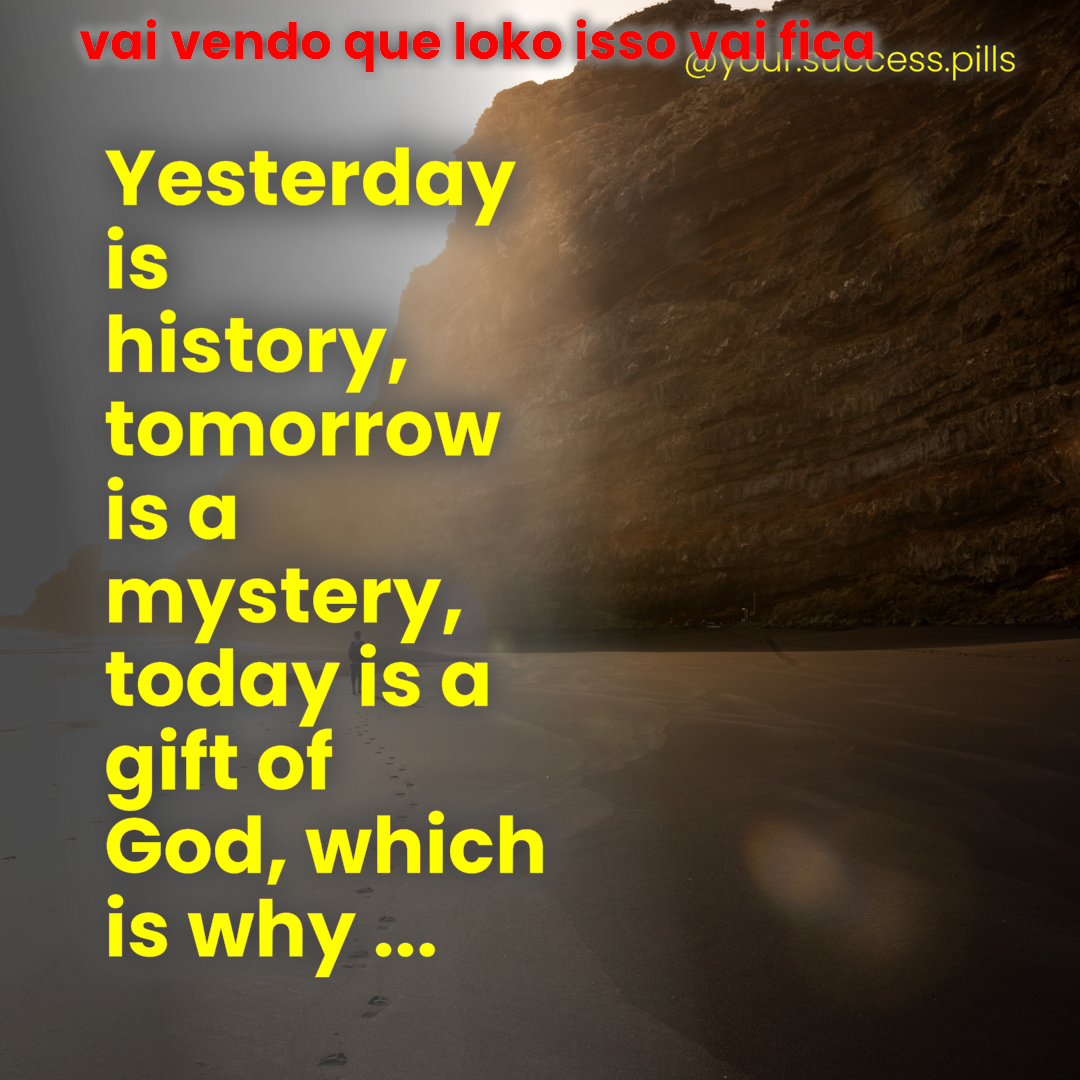

In [9]:
post

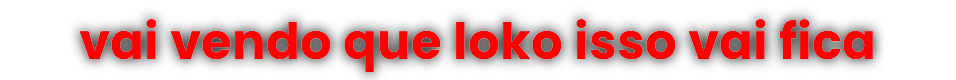

In [4]:
img

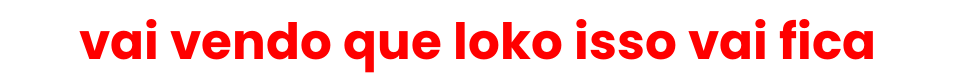

In [8]:
txt_img

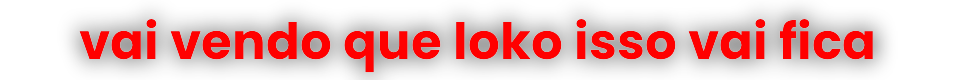

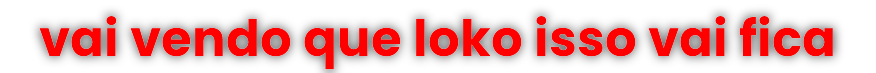

In [237]:
gray_halo

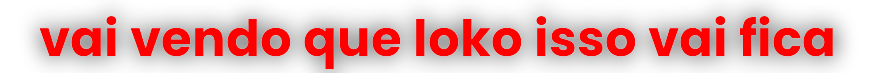

In [240]:
add_blurred_halo(txt_img, blur_radius=10)

In [204]:
fn = lambda x : 255 if x > 10 else 0
r = im.convert('L').point(fn, mode='1')

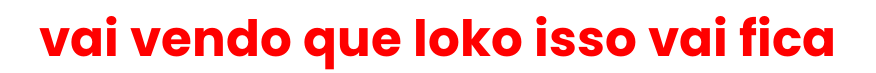

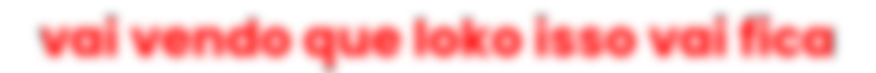

In [206]:
blurred_halo

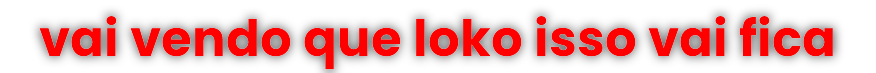

In [209]:
gray_halo

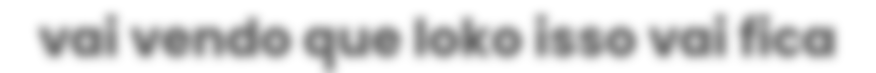

In [210]:
blurred_halo.convert('LA')

In [12]:
import sys
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    i = Image.open(LOCAL_PROCESSED_DATA_PATH / '34f210b6c969f16a6ff9127ee6107f7f2d03eb6f.JPEG')
    font = ImageFont.load_default()
    txt = 'Example 1234'
    text_col = (0, 255, 0) # bright green
    halo_col = 'black'   # black
    i2 = draw_text_with_halo(i, (20, 20), txt, font, text_col, halo_col)
#     i2.save('halo.png')